# Open Street Map Exposure Layer

This module of CLIMADA queries any desired features from the OSM API, stores them as shapefiles and serves as a source to either refine an exposure layer (as "stencil" dividing exisitng exposure layers into zero-value and high-value areas) or to define an entirely new exposure layer.

It comes with 4 functions:
* `get_features_OSM` 
   Queries features from OSM within a bounding box, puts them in the correct shapes (i.e. (Multi)-Polygons) and stores them in a geo-dataframe
* `get_highValueArea`
   Inverts the area of the bounding box, in case low-value features were queried with get_features_OSM, to retrieve high-value area. Stores output in a geo-dataframe
* `get_osmstencil_litpop`
   Gets a LitPop exposure for bounding box area, re-distributes LitPop values from centroids falling in low-value areas to high value areas queried previously. Output is again an exposure.
* `make_osmexposure`
   Builds a new exposure from scratch, by filling features queried with get_features_OSM (e.g. buildings) with values according to m^2 of the features

## Use Case 1: Refine (LitPop) Exposure with zero-value and high-value area division

Any features can be queried from Open Street Map.
"Low value features", i.e. nature, etc. that cover most of it are:
* 'natural',
* 'water', 
* 'waterway', 
* 'landuse=forest', 
* 'landuse=farmland',
* 'landuse=grass', 
* 'wetland'

To get an idea about the features that are available on OSM, have a look on TagInfo https://taginfo.openstreetmap.org/keys

In [1]:
# Load required packages:
import climada.entity.exposures.open_street_map as OSM

2019-07-30 08:34:48,490 - climada - DEBUG - Loading default config file: /Users/aznarsig/Documents/Python/climada_python/climada/conf/defaults.conf


Querying Relations, Nodes and Ways for landuse=grass...
Nodes from Ways query for landuse=grass: done.
Nodes and Ways from Relations query for landuse=grass: done.
Converting results for landuse=grass to correct geometry and GeoDataFrame: Lines and Polygons
Converting results for landuse=grass to correct geometry and GeoDataFrame: MultiPolygons
Combined all results for landuse=grass to one GeoDataFrame: done


/Users/evelynm/anaconda3/envs/climada_env/lib/python3.7/site-packages/geopandas/plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


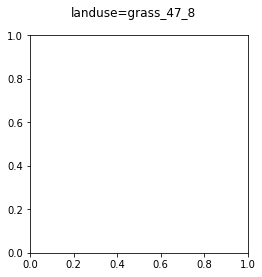

Querying Relations, Nodes and Ways for wetland...
Nodes from Ways query for wetland: done.
Nodes and Ways from Relations query for wetland: done.
Converting results for wetland to correct geometry and GeoDataFrame: Lines and Polygons
Converting results for wetland to correct geometry and GeoDataFrame: MultiPolygons
Combined all results for wetland to one GeoDataFrame: done


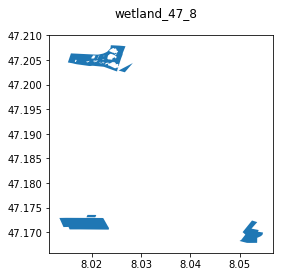

Querying Relations, Nodes and Ways for water...
Nodes from Ways query for water: done.
Nodes and Ways from Relations query for water: done.
Converting results for water to correct geometry and GeoDataFrame: Lines and Polygons
Converting results for water to correct geometry and GeoDataFrame: MultiPolygons
Combined all results for water to one GeoDataFrame: done


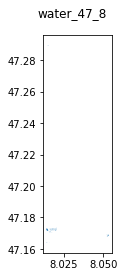

Querying Relations, Nodes and Ways for natural...
Nodes from Ways query for natural: done.
Nodes and Ways from Relations query for natural: done.
Converting results for natural to correct geometry and GeoDataFrame: Lines and Polygons
Converting results for natural to correct geometry and GeoDataFrame: MultiPolygons
Combined all results for natural to one GeoDataFrame: done


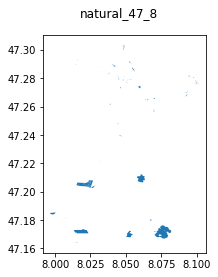

Querying Relations, Nodes and Ways for waterway...
Nodes from Ways query for waterway: done.
Nodes and Ways from Relations query for waterway: done.
Converting results for waterway to correct geometry and GeoDataFrame: Lines and Polygons
Converting results for waterway to correct geometry and GeoDataFrame: MultiPolygons
Combined all results for waterway to one GeoDataFrame: done


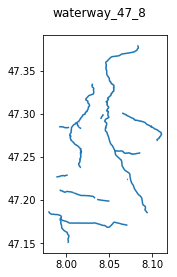

Querying Relations, Nodes and Ways for landuse=forest...
Nodes from Ways query for landuse=forest: done.
Nodes and Ways from Relations query for landuse=forest: done.
Converting results for landuse=forest to correct geometry and GeoDataFrame: Lines and Polygons
Converting results for landuse=forest to correct geometry and GeoDataFrame: MultiPolygons
Combined all results for landuse=forest to one GeoDataFrame: done


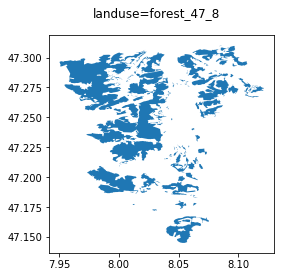

Querying Relations, Nodes and Ways for landuse=farmland...
Nodes from Ways query for landuse=farmland: done.
Nodes and Ways from Relations query for landuse=farmland: done.
Converting results for landuse=farmland to correct geometry and GeoDataFrame: Lines and Polygons
Converting results for landuse=farmland to correct geometry and GeoDataFrame: MultiPolygons
Combined all results for landuse=farmland to one GeoDataFrame: done


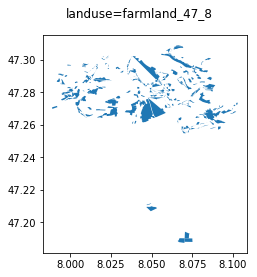

Combining all low-value GeoDataFrames into one GeoDataFrame...
adding results from landuse=grass ...
adding results from wetland ...
adding results from water ...
adding results from natural ...
adding results from waterway ...
adding results from landuse=forest ...
adding results from landuse=farmland ...


/Users/evelynm/anaconda3/envs/climada_env/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


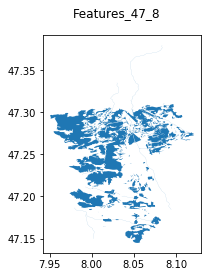

In [3]:
# Example from rural area in Canton Lucerne: Get all areas that are of zero / low value:
# Sometimes, if server load is too high, you may get an OverpassTooManyRequests error. Just wait 10 secs, try again.

save_path = 'your_path_to_save_directory' #'/Users/evelynm/Documents/ETH/Flood_Landslide/CLIMADA_backup/OSM_exposure/data_overpy/test_Lucerne'

Low_Value_gdf_14_87 = OSM.get_features_OSM([47.16, 8.0, 47.3, 8.0712],\
                                      {'natural','water', 'waterway', 'landuse=forest', 'landuse=farmland','landuse=grass', 'wetland'}, save_path = save_path, check_plot=1)

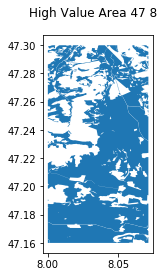

In [4]:
# For an exposure, we are generally interested in the high value areas. 
# -> Invert low-vaue area within the bounding box
High_Value_gdf_47_8 = OSM.get_highValueArea([47.16, 8.0, 47.3, 8.0712], save_path = save_path, \
                                        Low_Value_gdf = save_path+'/OSM_features_47_8.shp')

Let's get an exposure layer from LitPop, and refine it by high the value stencil obtained previously:
Re-assign the values from centroids lying in low-value area to those in high-value area.
There are three modes available to re-assigning the values:
- proportional mode (according to their value)
- even mode (every centroid gets same fraction)
- nearest neighbour mode (high-value centroid closest to low-value centroid get it).

2019-06-24 13:59:42,977 - climada.entity.exposures.litpop - INFO - Generating LitPop data at a resolution of 30.0 arcsec.
2019-06-24 13:59:42,980 - climada.entity.exposures.nightlight - DEBUG - Found all required satellite data (1 files) in folder /Users/evelynm/climada_python/data/system
2019-06-24 13:59:42,981 - climada.entity.exposures.litpop - DEBUG - Importing /Users/evelynm/climada_python/data/system/BlackMarble_2016_C1_geo_gray.tif.
2019-06-24 13:59:59,187 - climada.entity.exposures.gpw_import - INFO - Reference year: 2016. Using nearest available year for GWP population data: 2015
2019-06-24 13:59:59,188 - climada.entity.exposures.gpw_import - INFO - GPW Version v4.11
2019-06-24 13:59:59,188 - climada.entity.exposures.gpw_import - DEBUG - Importing /Users/evelynm/climada_python/data/system/gpw-v4-population-count-rev11_2015_30_sec_tif/gpw_v4_population_count_rev11_2015_30_sec.tif
2019-06-24 14:00:22,153 - climada.util.finance - INFO - GDP CHE 2014: 7.092e+11.
2019-06-24 14:00:2

/Users/evelynm/anaconda3/envs/climada_env/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-24 14:00:36,923 - climada.entity.exposures.base - INFO - Setting latitude and longitude attributes.
2019-06-24 14:00:36,928 - climada.entity.exposures.base - INFO - crs set to default value: {'init': 'epsg:4326', 'no_defs': True}
2019-06-24 14:00:36,929 - climada.entity.exposures.base - INFO - tag metadata set to default value:  File: 
 Description: 
2019-06-24 14:00:36,930 - climada.entity.exposures.base - INFO - ref_year metadata set to default value: 2018
2019-06-24 14:00:36,931 - climada.entity.exposures.base - INFO - value_unit metadata set to default value: USD
2019-06-24 14:00:36,932 - climada.entity.exposures.base - INFO - meta metadata set to default value: None
2019-06-24 14:00:36,933 - climada.entity.exposures.base - INFO - Hazard type not set in if_
2019-06-24 14:00:36,934 - climada.entity.exposures.base - INFO - centr_ not set.
2019-06-24 14:00:36,934 - climada.entity.exposures.base - INFO - deductible not set.
2019-06-24 14:00:36,936 - climada.entity.exposures.bas

/Users/evelynm/anaconda3/envs/climada_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->['region_id', 'if_', 'geometry']]

  This is separate from the ipykernel package so we can avoid doing imports until
/Users/evelynm/anaconda3/envs/climada_env/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


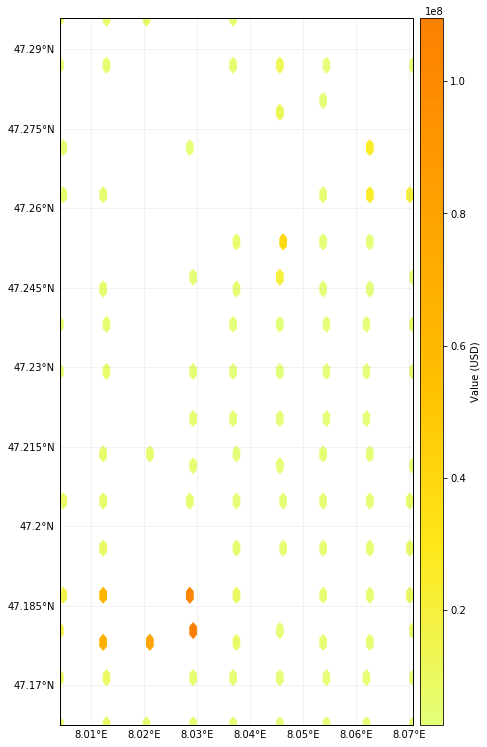

In [5]:
# One command does it all (getting LitPop Exp, re-assigning values, converting back into exposure format)
exposure_high_47_8 = OSM.get_osmstencil_litpop([47.16, 8.0, 47.3, 8.0712],'CHE',"proportional", highValueArea = \
                          save_path + '/High_Value_Area_47_8.shp' , save_path = save_path)  

## Use Case 2: Set up a high-resolution exposure from scratch with OSM

We may want to query directly features of high value from OSM, such as buildings, and assign values and an exposure structure to them.

Querying Relations, Nodes and Ways for building...
Nodes from Ways query for building: done.
Nodes and Ways from Relations query for building: done.
Converting results for building to correct geometry and GeoDataFrame: Lines and Polygons
Converting results for building to correct geometry and GeoDataFrame: MultiPolygons
Combined all results for building to one GeoDataFrame: done


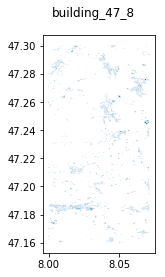

Combining all low-value GeoDataFrames into one GeoDataFrame...
adding results from building ...


/Users/evelynm/anaconda3/envs/climada_env/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


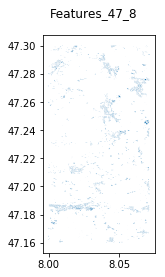

In [3]:
# Query all items tagged "building" in OSM.

save_path = save_path = 'your_path_to_save_directory' #'/Users/evelynm/Documents/ETH/Flood_Landslide/CLIMADA_backup/OSM_exposure/data_overpy/test_Lucerne'

High_val_houses_47_8 = OSM.get_features_OSM([47.16, 8.0, 47.3, 8.0712],
                                      {'building'}, save_path = save_path, check_plot=1)

How to assign values to the building shapes? Currently, there are two options:
- default option --> 5'400 Chf / m^2
- LitPop value for this area, distributed proportionally by area of the buildings.

Output format is a CLIMADA exposure (POLYGON shape of houses converted to POINT geometry by getting mid-point)

2019-06-24 14:10:24,951 - climada.entity.exposures.base - INFO - Setting latitude and longitude attributes.
2019-06-24 14:10:25,078 - climada.entity.exposures.base - INFO - crs set to default value: {'init': 'epsg:4326', 'no_defs': True}
2019-06-24 14:10:25,079 - climada.entity.exposures.base - INFO - tag metadata set to default value:  File: 
 Description: 
2019-06-24 14:10:25,079 - climada.entity.exposures.base - INFO - ref_year metadata set to default value: 2018
2019-06-24 14:10:25,080 - climada.entity.exposures.base - INFO - value_unit metadata set to default value: USD
2019-06-24 14:10:25,080 - climada.entity.exposures.base - INFO - meta metadata set to default value: None
2019-06-24 14:10:25,081 - climada.entity.exposures.base - INFO - Setting if_ to default impact functions ids 1.
2019-06-24 14:10:25,084 - climada.entity.exposures.base - INFO - centr_ not set.
2019-06-24 14:10:25,085 - climada.entity.exposures.base - INFO - deductible not set.
2019-06-24 14:10:25,086 - climada.

/Users/evelynm/anaconda3/envs/climada_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['Item', 'Name', 'Natural_Ty', 'Natural__1', 'Type', 'geo_polys', 'geometry']]

  This is separate from the ipykernel package so we can avoid doing imports until


2019-06-24 14:10:39,496 - climada.entity.exposures.litpop - INFO - Generating LitPop data at a resolution of 30.0 arcsec.
2019-06-24 14:10:39,497 - climada.entity.exposures.nightlight - DEBUG - Found all required satellite data (1 files) in folder /Users/evelynm/climada_python/data/system
2019-06-24 14:10:39,498 - climada.entity.exposures.litpop - DEBUG - Importing /Users/evelynm/climada_python/data/system/BlackMarble_2016_C1_geo_gray.tif.
2019-06-24 14:10:55,647 - climada.entity.exposures.gpw_import - INFO - Reference year: 2016. Using nearest available year for GWP population data: 2015
2019-06-24 14:10:55,649 - climada.entity.exposures.gpw_import - INFO - GPW Version v4.11
2019-06-24 14:10:55,650 - climada.entity.exposures.gpw_import - DEBUG - Importing /Users/evelynm/climada_python/data/system/gpw-v4-population-count-rev11_2015_30_sec_tif/gpw_v4_population_count_rev11_2015_30_sec.tif
2019-06-24 14:11:19,862 - climada.util.finance - INFO - GDP CHE 2014: 7.092e+11.
2019-06-24 14:11:2

/Users/evelynm/anaconda3/envs/climada_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['Item', 'Name', 'Natural_Ty', 'Natural__1', 'Type', 'geo_polys', 'geometry']]

  
/Users/evelynm/anaconda3/envs/climada_env/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


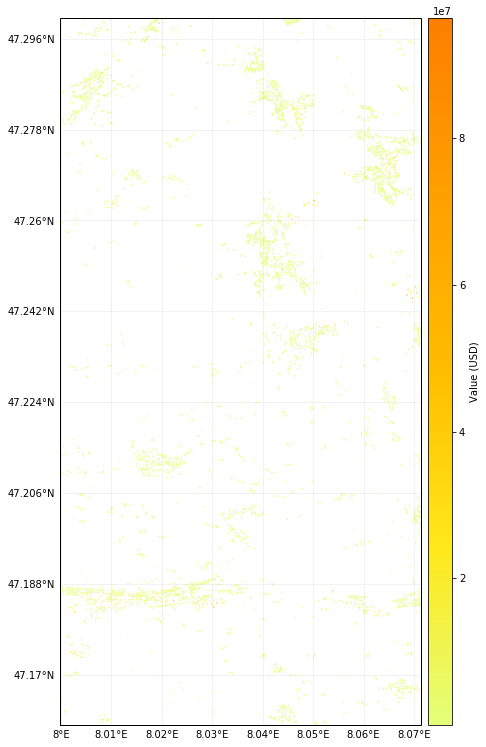

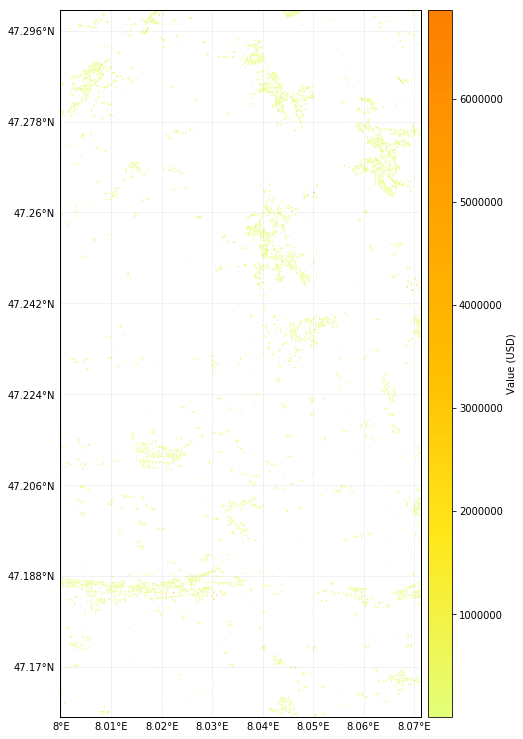

In [10]:
# Default
buildings_47_8_default = OSM.make_osmexposure(save_path+'/OSM_features_47_8.shp', mode = 'default', 
                                            save_path = save_path, check_plot=1)
# With LitPop values
buildings_47_8_LitPop = OSM.make_osmexposure(save_path+'/OSM_features_47_8.shp', country = 'CHE', mode="LitPop", 
                                          save_path = save_path, check_plot=1)

## Comparison over different regions and with satellite data

OSM features are very detailed for Europe, the US and other high income regions.
It may provide a "good enough" and consistent exposure base for high resolution queries (e.g. on a house-basis) in those regions (as in Use Case 2), and naturally also for lower-resolution queries (as in Use Case 1). 

Comparison High-Value / Low-Value divisions in Use Case 1 with CORINE Land Use satellite data yielded very similar results:
(show picture?)

For low-income countries, data is usually not good enough for high-resolution queries an in Use Case 2, but a visual inspection may be worth it (some cities have been mapped in detail due to some NGO work, etc.) 

Querying Relations, Nodes and Ways for building...
Nodes from Ways query for building: done.
Nodes and Ways from Relations query for building: done.
Converting results for building to correct geometry and GeoDataFrame: Lines and Polygons
Converting results for building to correct geometry and GeoDataFrame: MultiPolygons
Combined all results for building to one GeoDataFrame: done


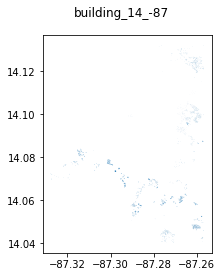

Querying Relations, Nodes and Ways for highway...
Nodes from Ways query for highway: done.
Nodes and Ways from Relations query for highway: done.
Converting results for highway to correct geometry and GeoDataFrame: Lines and Polygons
Converting results for highway to correct geometry and GeoDataFrame: MultiPolygons
Combined all results for highway to one GeoDataFrame: done


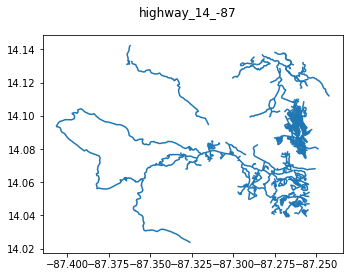

Combining all low-value GeoDataFrames into one GeoDataFrame...
adding results from building ...
adding results from highway ...


/Users/evelynm/anaconda3/envs/climada_env/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


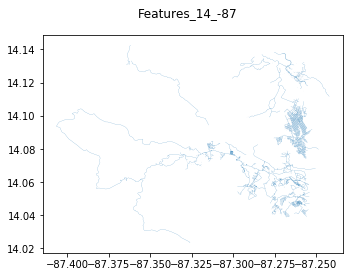

In [11]:
# Example: Streets and Houses in Tegucigalpa, Honduras (building inventory clearly incomplete):
save_path = '/Users/evelynm/Documents/ETH/Flood_Landslide/CLIMADA_backup/OSM_exposure/data_overpy/test_Tegu'
Infrastructure_Tegu = OSM.get_features_OSM([14.0318,-87.368,14.1318,-87.2568],\
                                      {'building','highway'}, save_path = save_path, check_plot=1)